# Ungraded Lab - Summary Statistics

In this notebook, you will be working with two distinct datasets. You will notice that relying solely on the main statistical measures such as mean, variance (or standard deviation), and correlation may not always effectively describe the datasets. Therefore, it is always advisable to supplement these measures with visualization techniques and/or other statistical measures to gain a deeper understanding of the data.

You will be working with two well-known datasets: Anscombe's quartet and the Datasaurus Dozen dataset. These datasets are artificially generated and are used to illustrate the fact that some metrics can fail to capture important information present in a dataset. More specifically, these datasets are used to demonstrate how relying solely on metrics can sometimes be misleading. If you're interested, you can read more about Anscombe's quartet and the Datasaurus Dozen dataset at their respective [Wikipedia](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) page and [Autodesk Research](https://damassets.autodesk.net/content/dam/autodesk/research/publications-assets/pdf/same-stats-different-graphs.pdf) article.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import utils1
%matplotlib widget


# 1.1 First data set - Anscombe's quartet

This first dataset was initially constructed by the statistician Francis Anscombe to demonstrate both the importance of graphing data when analyzing it, and the effect of outliers and other influential observations on statistical properties. (From wikipedia)

Let us explore the first dataset. To do this, you will be utilizing the popular Python library called [pandas](https://pandas.pydata.org/), specifically its main object known as [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame).

To read the dataset, which is stored in a `.csv file`, you can use the read_csv function in pandas. This function enables you to load a DataFrame immediately. For further information on this function, you can type help(pd.read_csv) in your code editor.

In [2]:
# This line of code reads the dataset named 'df_anscombe.csv', which is stored in the same directory as this notebook.
df_anscombe = pd.read_csv('df_anscombe.csv')

The call `df_anscombe.head()` will show you the first five rows of the data set, so you can have a look on its data.

In [3]:
df_anscombe.head()

,x,y,group
0,10.0,8.04,1
1,8.0,6.95,1
2,13.0,7.58,1
3,9.0,8.81,1
4,11.0,8.33,1


In [4]:
# Let's determine the number of groups present in this dataset.
df_anscombe.group.nunique()

4

This dataset comprises of four groups of data, each containing two components - `x` and `y`. To analyze the data, you can obtain the mean and variance of each group, as well as the correlation between x and y within each group. Pandas provides a built-in function called `DataFrame.describe` that displays common statistics for each variable. To group the data by the group column, you can use the `DataFrame.groupby` function.

The next block of code first groups the `DataFrame` based on the group column, and then applies the describe function to obtain the common statistics for each variable in each group.

In [5]:
df_anscombe.groupby('group').describe()

x                                               y            \
      count mean       std  min  25%  50%   75%   max count      mean   
group                                                                   
1      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
2      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
3      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
4      11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                 
            std   min    25%   50%   75%    max  
group                                            
1      2.031568  4.26  6.315  7.58  8.57  10.84  
2      2.031657  3.10  6.695  8.14  8.95   9.26  
3      2.030424  5.39  6.250  7.11  7.98  12.74  
4      2.030579  5.25  6.170  7.04  8.19  12.50

The groups appear to be quite similar, as evidenced by the identical mean and standard deviation values for both `x` and `y` within each group.

Additionally, you can analyze the correlation between `x` and `y` within each group.

To obtain the correlation matrix for each group, you can follow the same approach as before. First, group the data by the `group` column using `DataFrame.groupby`, and then apply the `.corr` function.

In [6]:
df_anscombe.groupby('group').corr()

x         y
group                      
1     x  1.000000  0.816421
      y  0.816421  1.000000
2     x  1.000000  0.816237
      y  0.816237  1.000000
3     x  1.000000  0.816287
      y  0.816287  1.000000
4     x  1.000000  0.816521
      y  0.816521  1.000000

As observed, the correlation between `x` and `y` is identical within each group up to three decimal places. Moreover, the high correlation coefficient values suggest a strong linear correlation between `x` and `y` within each group.

Despite the similarities in the statistical measures for the groups, it is still necessary to visualize the data to get a better understanding of the differences, if any.

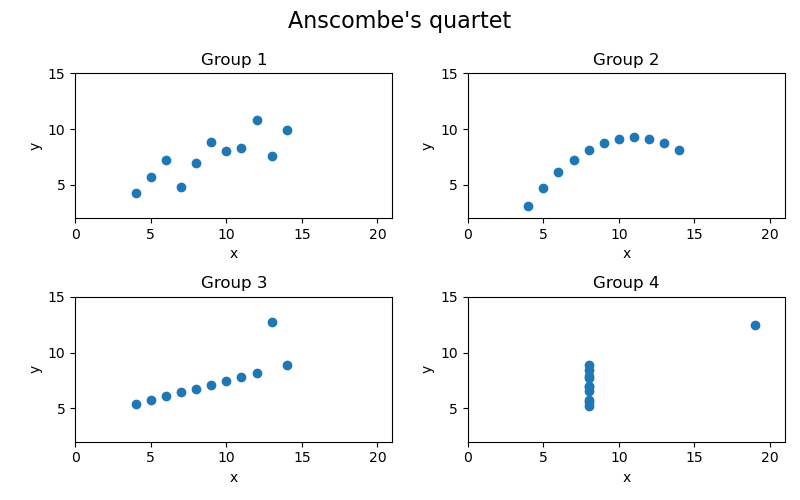

In [7]:
utils1.plot_anscombes_quartet()

Upon visualizing the data, the four groups appear to be quite distinct:

1. The first group shows a clear linear relationship between `x` and `y`.
2. The second group, on the other hand, exhibits a non-linear pattern, indicating that the usual Pearson correlation may not be appropriate to describe the dataset.
3. The third group would be linear if it were not for a single outlier.
4. The fourth group demonstrates that `y` can have different values for the same `x`, suggesting that there is no clear relationship between `x` and `y`. However, there is also an outlier in this group.

These four groups illustrate that summary statistics alone are not sufficient for investigating data. Visualizing the data, analyzing possible outliers, and identifying more complex relationships are essential to gain a better understanding of the underlying patterns in the data.

# 2 - Second data set - Datasaurus Dozen

The creation of Anscombe's quartet inspired other authors to generate datasets that have different relationships among its points but share the same summary statistics. One such dataset is the Datasaurus Dozen, which was created by AutoDesk. 

In this case, you will take a different approach. Instead of analyzing summary statistics and then plotting the data points, you will compare two datasets from the dozen and compute their statistics.

In [8]:
df_datasaurus = pd.read_csv("datasaurus.csv")

The next cell will run a widget where you can investigate this dataset, which has different groups in it.

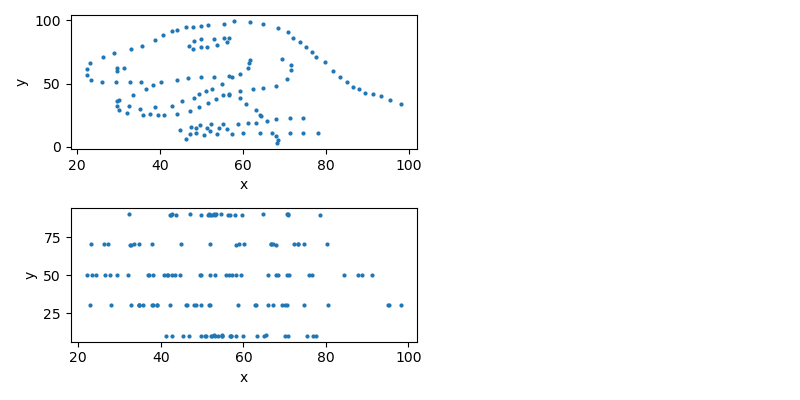

In [9]:
utils1.display_widget()

As you have observed, the first dataset was not an anomaly; it is possible to have different datasets with the same summary statistics. Hence, it is essential to keep in mind while analyzing data that the summary statistics alone may not provide a complete picture of the underlying patterns and relationships.

Congratulations! You have completed this ungraded lab and now understand that summary statistics may not capture all the necessary information to describe your data accurately. Keep in mind that visualizations and more in-depth analyses are often needed to get a better understanding of your data.